In [1]:
import random
import math
import time
import json
import os
from numba import jit

import numpy as np
from tqdm import tqdm
from PIL import Image
from sklearn.mixture import GaussianMixture as GMM

In [2]:
img = np.array(Image.open("./lab4_data/alpaca.jpg"), dtype=np.float32)
segm = np.array(Image.open("./lab4_data/alpaca-segmentation.png"), dtype=np.float32)
print("img.shape : ", img.shape, "; segm.shape : ", segm.shape)

img.shape :  (533, 800, 3) ; segm.shape :  (533, 800, 3)


###  First step

In [3]:
fg = img[segm.sum(axis=-1) > 0]
bg = img[segm.sum(axis=-1) == 0]
###
fgm = GMM(n_components=3).fit(fg)
fg_means = fgm.means_
fg_sigmas = fgm.covariances_
###
bgm = GMM(n_components=3).fit(bg)
bg_means = fgm.means_
bg_sigmas = fgm.covariances_

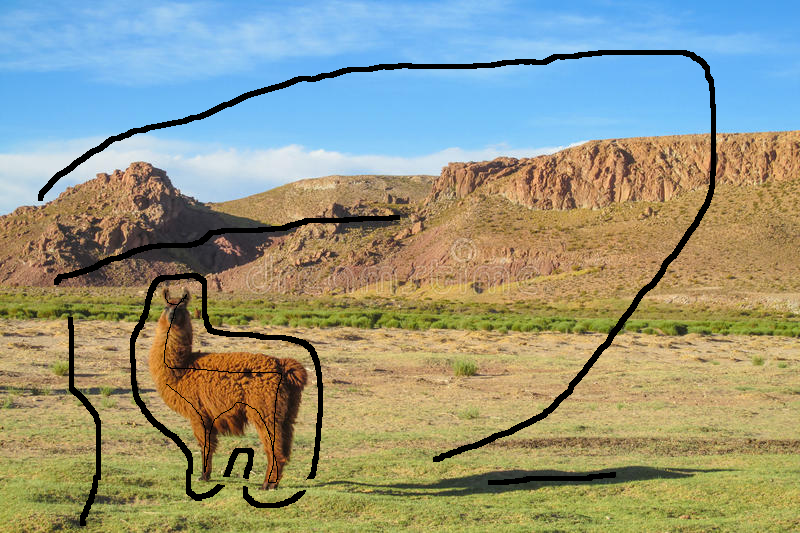

In [8]:
Image.fromarray(bg.astype(np.uint8))

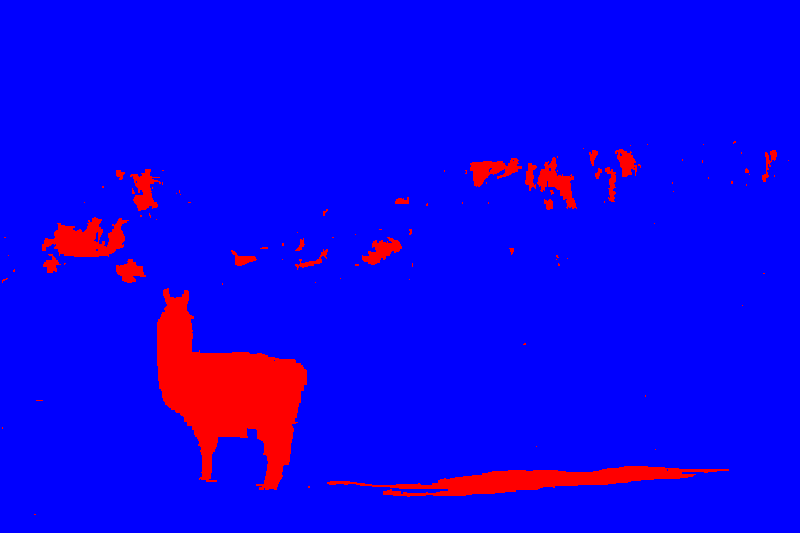

In [4]:
Image.fromarray(img.astype(np.uint8))